In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from typing import List, Callable, Dict, Any

In [12]:
def integrate(f: Callable[[NDArray], NDArray], a: float, b: float, steps=1000) -> float:
    """
    Integrate f from a to b using the trapezoidal rule.
    """
    x = np.linspace(a, b, steps)
    y = f((x[:-1] + x[1:])/2)
    return np.sum((x[1:] - x[:-1]) * y)

In [13]:
def f(x): return 10 * x + 2
r = integrate(f, 0, 1, 100)
r

7.0

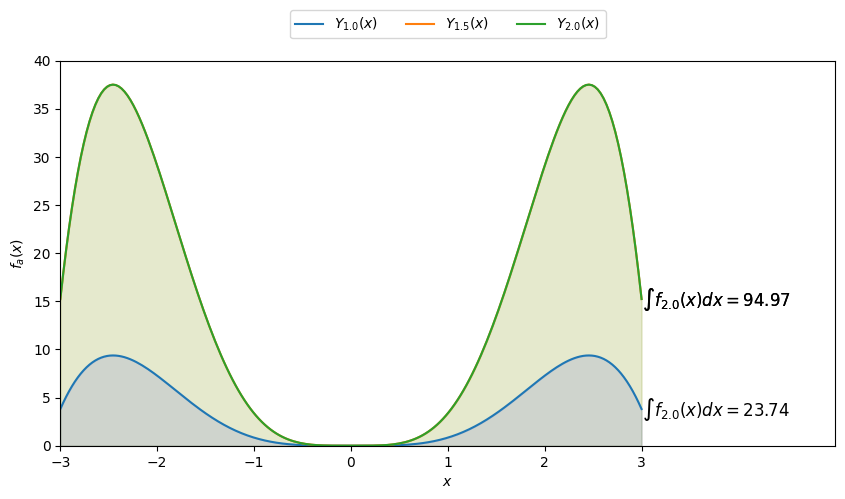

In [79]:
a = [1.0, 1.5, 2.0]
a = np.array(a).reshape(3,1)
x = np.linspace(-3,3, 200)
y = a**2 * x**3 * np.sin(x)


fig = plt.figure(figsize=(10,5), frameon=True)

ax = fig.add_subplot(1,1,1)
ax.set_xlim(-3,5)
ax.xaxis.set_ticks(np.arange(-3, 4))
ax.set_ylim(0,40)
ax.set_xlabel('$x$')
ax.set_ylabel('$f_a(x)$')


line1, = ax.plot(x,y[0], label='$Y_{1.0}(x)$')
ax.fill_between(
        x= x, 
        y1= y[0],
        color= "b",
        alpha= 0.1)
ax.text(3, y[0][-1], '$\int f_{{2.0}}(x)dx = {}$'.format(round(np.trapz(y[0], x),2)), fontsize=12,ha='left', va='center', color='black')

line2, = ax.plot(x,y[1], label='$Y_{1.5}(x)$')
ax.fill_between(
        x= x, 
        y1= y[1],
        color= "orange",
        alpha= 0.1)
ax.text(3, y[1][-1], '$\int f_{{2.0}}(x)dx = {}$'.format(round(np.trapz(y[1], x),2)), fontsize=12,ha='left', va='center', color='black')

line3, = ax.plot(x,y[2], label='$Y_{2.0}(x)$')
ax.fill_between(
        x= x, 
        y1= y[2],
        color= "green",
        alpha= 0.1)
ax.text(3, y[2][-1], '$\int f_{{2.0}}(x)dx = {}$'.format(round(np.trapz(y[2], x),2)), fontsize=12,ha='left', va='center', color='black')

ax.legend(handles=[line1, line2, line3],bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=3)


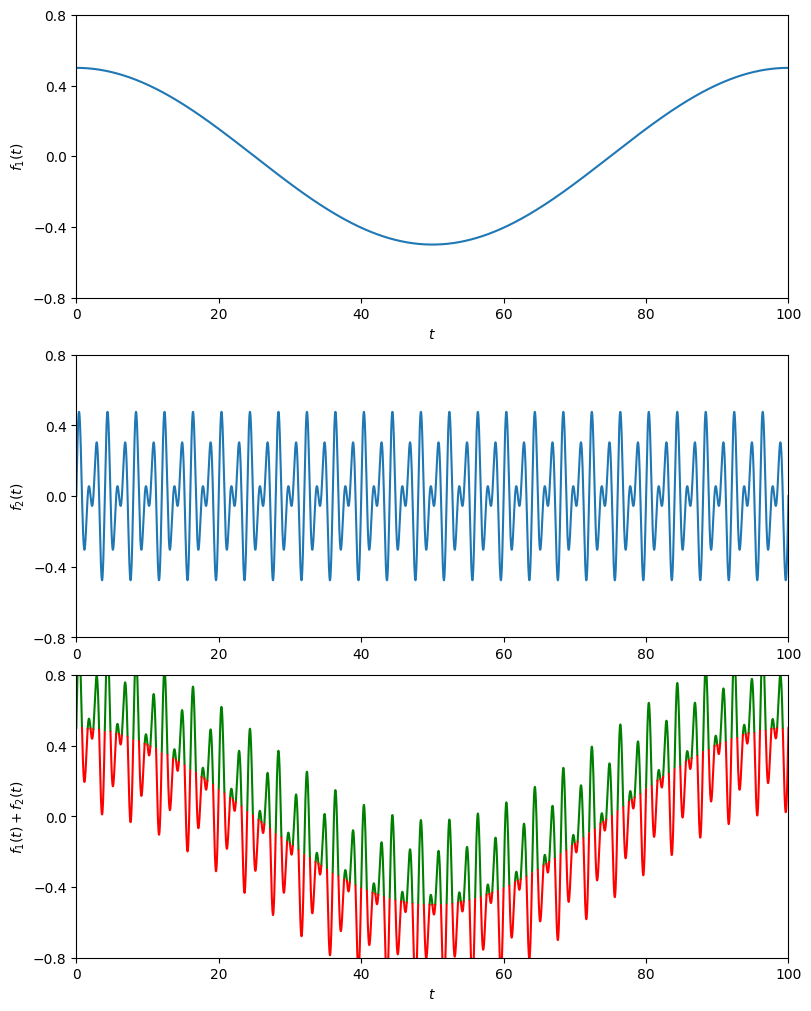

In [107]:
time = np.linspace(0, 100, 20000)
f1 = 0.5 * np.cos(1/50 * np.pi * time)
f2 = 0.25 * (np.sin(np.pi * time) + np.sin(3/2 * np.pi * time))
f3 = f1 + f2

fig, axes = plt.subplots(ncols=1, nrows=3,constrained_layout=True, figsize=(8,10))
(ax1, ax2, ax3) = axes

ax1.set_xlim(0,100)
ax1.set_ylim(-0.8,0.8)
ax1.set_yticks([-0.8, -0.4, 0, 0.4, 0.8])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$f_1(t)$')
ax1.plot(time, f1, label='$f_1(t)$')

ax2.set_xlim(0,100)
ax2.set_ylim(-0.8,0.8)
ax2.set_yticks([-0.8, -0.4, 0, 0.4, 0.8])
ax1.set_xlabel('$t$')
ax2.set_ylabel('$f_2(t)$')
ax2.plot(time, f2, label='$f_2(t)$')

green_line = np.where(f3 >= f1, f3, np.nan)
red_line = np.where(f3 <= f1, f3, np.nan)
ax3.set_xlim(0,100)
ax3.set_ylim(-0.8,0.8)
ax3.set_yticks([-0.8, -0.4, 0, 0.4, 0.8])
ax3.set_xlabel('$t$')
ax3.set_ylabel('$f_1(t) + f_2(t)$')
ax3.plot(time, green_line, label='$f_3(t)$', color='green')
ax3.plot(time, red_line, label='$f_3(t)$', color='red')

plt.show()


In [136]:
html = requests.get("https://ehw.fit.vutbr.cz/izv/st_zemepis_cz.html")
print(html.encoding)
html.encoding = 'utf-8'
html_text = html.text
soup = BeautifulSoup(html_text, 'html.parser')

table = soup.find_all('table')[1]
rows = table.find_all('tr')[1:]

data = []
for row in rows:
    row = row.find_all('td')
    row = [cell.text for cell in row]
    data_dict = {
        "position": row[0],
        "lat": float(row[2][:-1].replace(',','.')),
        "lon": float(row[4][:-1].replace(',','.')),
        "height": float(row[6].replace('\xa0','').replace(',', '.'))
    }
    data.append(data_dict)

data

ISO-8859-1


[{'position': 'Cheb', 'lon': 50.0683, 'lat': 12.3913, 'height': 483.0},
 {'position': 'Karlovy Vary', 'lon': 50.2016, 'lat': 12.9139, 'height': 603.0},
 {'position': 'Přimda', 'lon': 49.6694, 'lat': 12.6779, 'height': 742.76},
 {'position': 'Kopisty', 'lon': 50.544, 'lat': 13.6227, 'height': 240.0},
 {'position': 'Tušimice', 'lon': 50.3765, 'lat': 13.3279, 'height': 322.4},
 {'position': 'Plzeň-Mikulka',
  'lon': 49.7645,
  'lat': 13.3787,
  'height': 359.8},
 {'position': 'Churáňov', 'lon': 49.0683, 'lat': 13.615, 'height': 1117.8},
 {'position': 'Milešovka', 'lon': 50.5549, 'lat': 13.9306, 'height': 830.5},
 {'position': 'Kocelovice', 'lon': 49.4672, 'lat': 13.8385, 'height': 519.0},
 {'position': 'Ústí nad Labem',
  'lon': 50.6833,
  'lat': 14.041,
  'height': 375.39},
 {'position': 'Doksany', 'lon': 50.4587, 'lat': 14.1699, 'height': 158.0},
 {'position': 'Praha-Ruzyně', 'lon': 50.1003, 'lat': 14.2555, 'height': 364.0},
 {'position': 'Praha-Karlov', 'lon': 50.0691, 'lat': 14.4276, 